In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("cr7vslm.csv")
lm=df[df.Player=="Lionel Messi"]
cr7=df[df.Player=="Cristiano Ronaldo"]

In [4]:
type(df.Player)

pandas.core.series.Series

In [5]:
df.columns

Index(['Player', 'Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

In [6]:
df.sample(2)

,Player,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
1047,Lionel Messi,17/18,LaLiga,5,2017-09-19,H,FC Barcelona,SD Eibar,6:01,CF,59,4:01,Left-footed shot,Sergio Busquets
306,Cristiano Ronaldo,10/11,LaLiga,9,2010-10-30,A,Real Madrid,Hercules CF,1:03,LW,82,1:02,Right-footed shot,Karim Benzema


# Data Cleaning

## 1. CR7

In [7]:
cr7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 1412
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Player            710 non-null    object
 1   Season            710 non-null    object
 2   Competition       710 non-null    object
 3   Matchday          710 non-null    object
 4   Date              710 non-null    object
 5   Venue             710 non-null    object
 6   Club              710 non-null    object
 7   Opponent          710 non-null    object
 8   Result            710 non-null    object
 9   Playing_Position  652 non-null    object
 10  Minute            710 non-null    object
 11  At_score          710 non-null    object
 12  Type              695 non-null    object
 13  Goal_assist       464 non-null    object
dtypes: object(14)
memory usage: 83.2+ KB


In [8]:
cr7.isna().sum()

Player                0
Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 15
Goal_assist         246
dtype: int64

### 1.Player Position

In [9]:
cr7['Playing_Position'].unique()

array(['LW', nan, 'RW', 'CF', 'LW ', 'CF '], dtype=object)

In [10]:
cr7['Playing_Position'].value_counts()

LW     356
CF     209
RW      79
LW       5
CF       3
Name: Playing_Position, dtype: int64

In [11]:
cr7['Playing_Position'].replace(['LW ', 'CF '],['LW','CF'],inplace=True)
cr7['Playing_Position'].value_counts(dropna=False)

LW     361
CF     212
RW      79
NaN     58
Name: Playing_Position, dtype: int64

In [12]:
cr7['Playing_Position'].fillna(method='bfill',inplace=True)
cr7['Playing_Position'].value_counts(dropna=False)

LW    363
CF    228
RW    119
Name: Playing_Position, dtype: int64

### 2. Type

In [13]:
cr7.Type.unique()

array(['Solo run', 'Header', 'Right-footed shot', 'Left-footed shot', nan,
       'Direct free kick', 'Tap-in', 'Penalty', 'Penalty rebound',
       'Long distance kick', 'Counter attack goal',
       'Deflected shot on goal'], dtype=object)

In [14]:
cr7.Type.value_counts(dropna=False)

Right-footed shot         253
Penalty                   132
Left-footed shot          113
Header                    112
Direct free kick           49
NaN                        15
Tap-in                     14
Long distance kick          9
Counter attack goal         6
Penalty rebound             3
Solo run                    2
Deflected shot on goal      2
Name: Type, dtype: int64

In [15]:
cr7.Type.fillna(method='bfill',inplace=True)
cr7.Type.value_counts(dropna=False)

Right-footed shot         257
Penalty                   132
Header                    115
Left-footed shot          113
Direct free kick           53
Tap-in                     14
Long distance kick          9
Penalty rebound             7
Counter attack goal         6
Solo run                    2
Deflected shot on goal      2
Name: Type, dtype: int64

### 3. Goal Assist

In [16]:
cr7.Goal_assist.value_counts(dropna=False)

NaN                  246
Karim Benzema         44
Gareth Bale           29
Mesut Ozil            26
Marcelo               23
                    ... 
Rui Jorge              1
Carlos Martins         1
Borja Mayoral          1
Emre Can               1
Sultan Al-Ghannam      1
Name: Goal_assist, Length: 92, dtype: int64

In [17]:
cr7.Goal_assist.fillna("Cristiano Ronaldo",inplace=True)
print(cr7.Goal_assist.value_counts())
cr7.Goal_assist.isna().sum()

Cristiano Ronaldo    246
Karim Benzema         44
Gareth Bale           29
Mesut Ozil            26
Marcelo               23
                    ... 
Rui Jorge              1
Carlos Martins         1
Borja Mayoral          1
Emre Can               1
Sultan Al-Ghannam      1
Name: Goal_assist, Length: 92, dtype: int64


0

In [18]:
cr7.isna().sum()

Player              0
Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                0
Goal_assist         0
dtype: int64

### 4. Minute

In [19]:
cr7.Minute.value_counts()

90      17
23      15
45      15
89      15
70      14
        ..
105      1
109      1
90+7     1
45+7     1
45+2     1
Name: Minute, Length: 106, dtype: int64

In [20]:
cr7.Minute=cr7.Minute.apply(str).apply(eval)
cr7.Minute.value_counts()

90     17
45     15
23     15
89     15
76     14
       ..
120     1
1       1
104     1
105     1
109     1
Name: Minute, Length: 102, dtype: int64

### 5. Date

In [21]:
cr7.Date=pd.to_datetime(cr7.Date)
cr7.Date.info()

<class 'pandas.core.series.Series'>
Int64Index: 710 entries, 0 to 1412
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
710 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.1 KB


## 2. Messi

In [22]:
lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 20 to 1411
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Player            703 non-null    object
 1   Season            703 non-null    object
 2   Competition       703 non-null    object
 3   Matchday          703 non-null    object
 4   Date              703 non-null    object
 5   Venue             703 non-null    object
 6   Club              703 non-null    object
 7   Opponent          703 non-null    object
 8   Result            703 non-null    object
 9   Playing_Position  703 non-null    object
 10  Minute            703 non-null    object
 11  At_score          703 non-null    object
 12  Type              702 non-null    object
 13  Goal_assist       489 non-null    object
dtypes: object(14)
memory usage: 82.4+ KB


In [23]:
lm.isna().sum()

Player                0
Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  1
Goal_assist         214
dtype: int64

### 1. Type

In [24]:
lm.Type.fillna(method='ffill',inplace=True)
lm.Type.value_counts()

Left-footed shot          436
Right-footed shot          86
Penalty                    84
Direct free kick           52
Header                     24
Tap-in                      9
Solo run                    4
Penalty rebound             3
Deflected shot on goal      2
Counter attack goal         1
Chest                       1
Long distance kick          1
Name: Type, dtype: int64

### 2. Goal Assist

In [25]:
lm.Goal_assist.value_counts(dropna=False)

NaN                 214
Luis Suarez          48
Dani Alves           42
Andres Iniesta       39
Xavi                 34
                   ... 
Munir El Haddadi      1
Lucas Digne           1
Paco Alcacer          1
Aleix Vidal           1
\t                    1
Name: Goal_assist, Length: 71, dtype: int64

In [26]:
lm.Goal_assist.fillna("Lionel Messi",inplace=True)
lm=lm[lm.Goal_assist!="\t"]
lm.Goal_assist.value_counts()

Lionel Messi        214
Luis Suarez          48
Dani Alves           42
Andres Iniesta       39
Xavi                 34
                   ... 
Munir El Haddadi      1
Lucas Digne           1
Paco Alcacer          1
Aleix Vidal           1
Achraf Hakimi         1
Name: Goal_assist, Length: 70, dtype: int64

### 3. Minute

In [27]:
lm.Minute.value_counts()

55      14
87      13
78      13
86      13
80      12
        ..
45+2     2
46       2
6        2
110      1
45+4     1
Name: Minute, Length: 96, dtype: int64

In [28]:
lm.Minute=lm.Minute.apply(str).apply(eval)
lm.Minute.value_counts()

55     14
78     13
87     13
86     13
90     12
       ..
7       3
93      3
6       2
14      2
110     1
Name: Minute, Length: 93, dtype: int64

### 4. Date

In [29]:
lm.Date.info()

<class 'pandas.core.series.Series'>
Int64Index: 702 entries, 20 to 1411
Series name: Date
Non-Null Count  Dtype 
--------------  ----- 
702 non-null    object
dtypes: object(1)
memory usage: 11.0+ KB


In [30]:
lm.Date=pd.to_datetime(lm.Date)
lm.Date.info()

<class 'pandas.core.series.Series'>
Int64Index: 702 entries, 20 to 1411
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
702 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.0 KB


## Data Analysis

In [31]:
cr7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 1412
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Player            710 non-null    object        
 1   Season            710 non-null    object        
 2   Competition       710 non-null    object        
 3   Matchday          710 non-null    object        
 4   Date              710 non-null    datetime64[ns]
 5   Venue             710 non-null    object        
 6   Club              710 non-null    object        
 7   Opponent          710 non-null    object        
 8   Result            710 non-null    object        
 9   Playing_Position  710 non-null    object        
 10  Minute            710 non-null    int64         
 11  At_score          710 non-null    object        
 12  Type              710 non-null    object        
 13  Goal_assist       710 non-null    object        
dtypes: datetime64[ns](1), int

In [32]:
lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 20 to 1411
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Player            702 non-null    object        
 1   Season            702 non-null    object        
 2   Competition       702 non-null    object        
 3   Matchday          702 non-null    object        
 4   Date              702 non-null    datetime64[ns]
 5   Venue             702 non-null    object        
 6   Club              702 non-null    object        
 7   Opponent          702 non-null    object        
 8   Result            702 non-null    object        
 9   Playing_Position  702 non-null    object        
 10  Minute            702 non-null    int64         
 11  At_score          702 non-null    object        
 12  Type              702 non-null    object        
 13  Goal_assist       702 non-null    object        
dtypes: datetime64[ns](1), in

<Axes: >

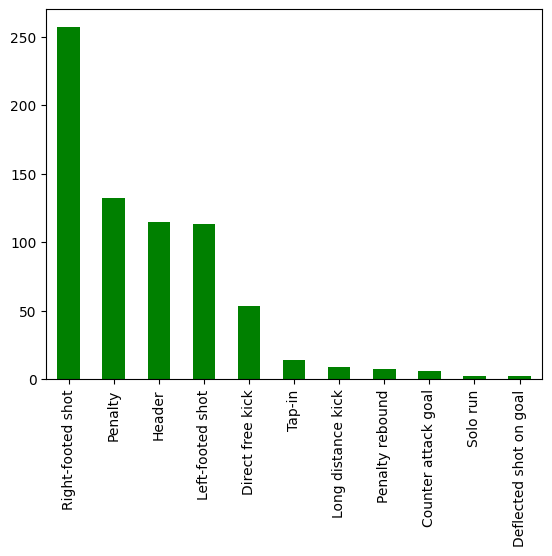

In [63]:
cr7['Type'].value_counts().plot(kind='bar',color="green")

<Axes: ylabel='Type'>

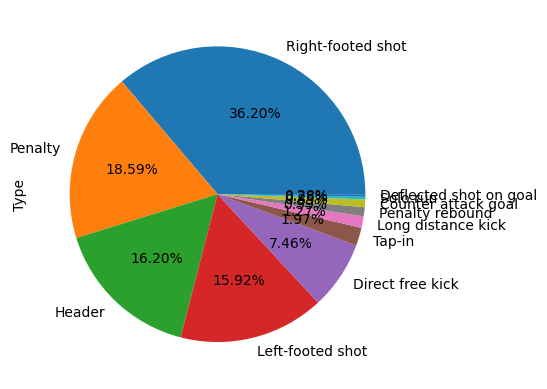

In [61]:
cr7['Type'].value_counts().plot(kind='pie',autopct='%.2f%%')

<strong> From The Graphs We can see That Cristiano Ronaldo Scores most of the goals by his Right Foot (36.2%) followed by Penaltiy goals(18.59).

<Axes: >

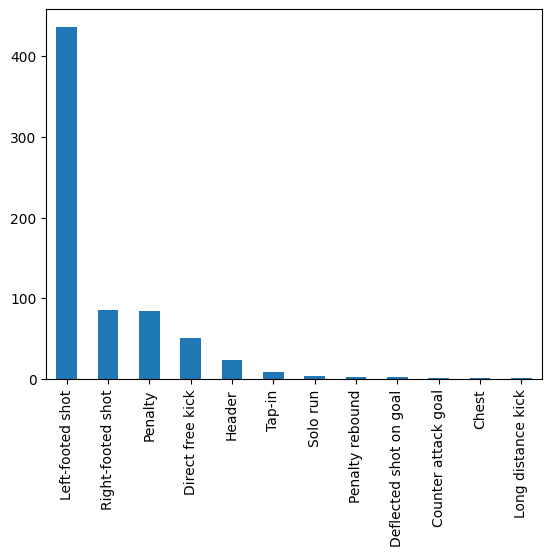

In [35]:
lm['Type'].value_counts().plot(kind='bar')

<Axes: ylabel='Type'>

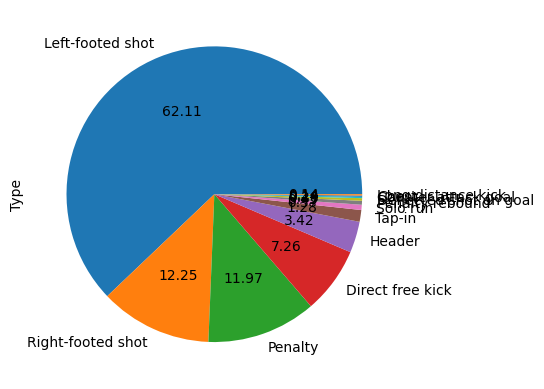

In [36]:
lm['Type'].value_counts().plot(kind="pie",autopct="%.2f")

<strong> Here We Can see that Messi scores most of his goals using his Left foot (62.1%).

(array([ 66.,  86.,  89.,  88.,  98.,  96., 100.,  80.,   5.,   2.]),
 array([  1. ,  12.9,  24.8,  36.7,  48.6,  60.5,  72.4,  84.3,  96.2,
        108.1, 120. ]),
 <BarContainer object of 10 artists>)

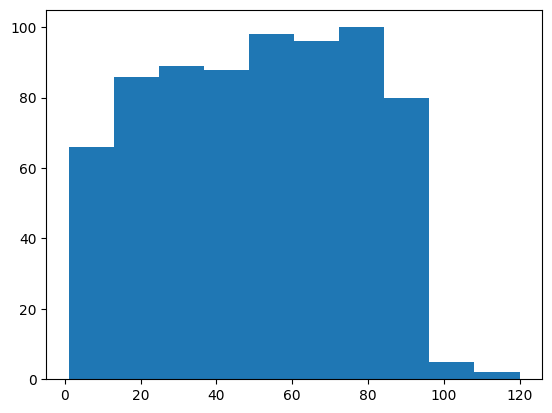

In [37]:
plt.hist(cr7['Minute'],bins=10)

(array([ 56.,  81.,  80.,  87.,  72.,  90.,  83., 105.,  47.,   1.]),
 array([  3. ,  13.7,  24.4,  35.1,  45.8,  56.5,  67.2,  77.9,  88.6,
         99.3, 110. ]),
 <BarContainer object of 10 artists>)

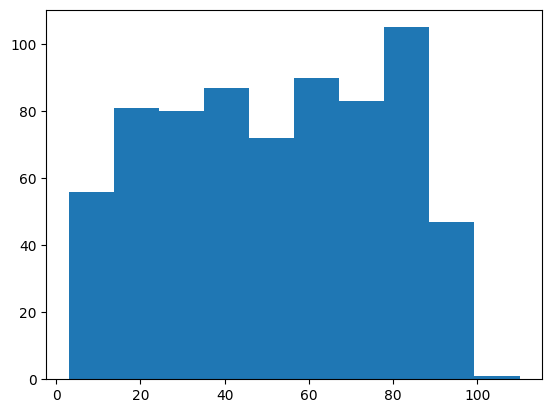

In [38]:
plt.hist(lm['Minute'],bins=10)

<strong> As we can CR7 than Messi has scored more goals in almost every range.

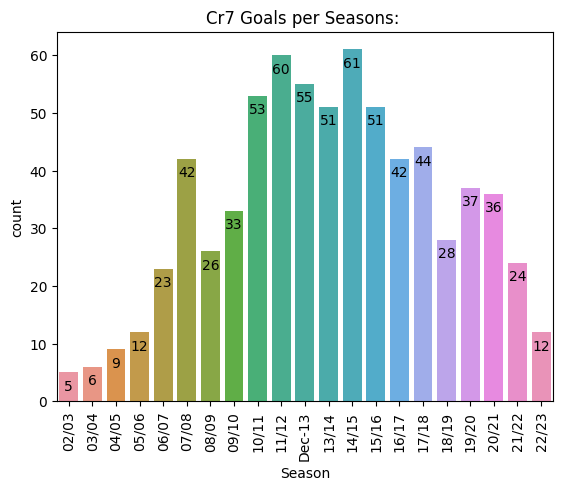

In [39]:
p=sns.countplot(data=cr7,x='Season')
plt.xticks(rotation=90)
plt.title('Cr7 Goals per Seasons: ')
for container in p.containers:
    p.bar_label(container,padding=-15)
avg_goals_cr= cr7.Season.value_counts().mean()

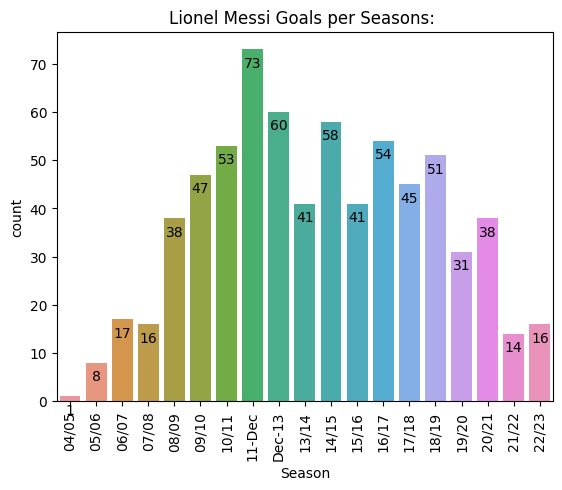

In [40]:
l=sns.countplot(data=lm,x="Season")
plt.title('Lionel Messi Goals per Seasons: ')
plt.xticks(rotation=90)
for container in l.containers:
    l.bar_label(container,padding=-15)
avg_goals_lm= lm.Season.value_counts().mean()

In [41]:
print(f"""Average Goals in a Season by:
1.CR7: {avg_goals_cr}
2.Messi: {avg_goals_lm}""")

Average Goals in a Season by:
1.CR7: 33.80952380952381
2.Messi: 36.94736842105263


<strong>Average Goals per Season of Messi are greater than Ronaldo.

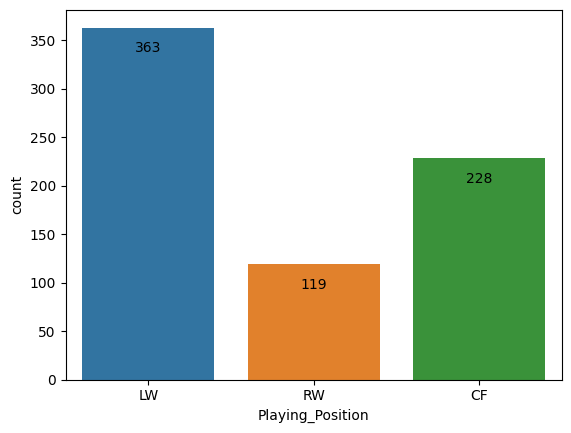

In [42]:
p_pcr=sns.countplot(data=cr7,x="Playing_Position")
for container in p_pcr.containers:
    p_pcr.bar_label(container,padding=-20)

<Axes: ylabel='Playing_Position'>

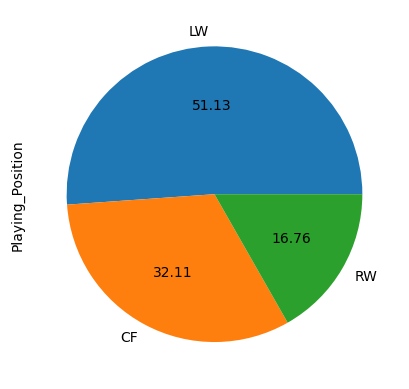

In [43]:
cr7.Playing_Position.value_counts().plot(kind="pie",autopct='%.2f')

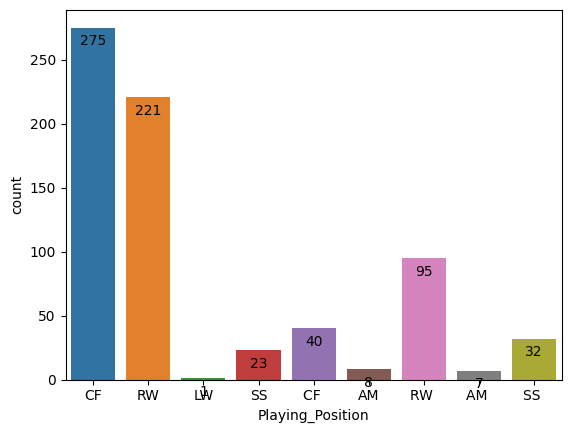

In [44]:
p_plm= sns.countplot(lm,x="Playing_Position")
for container in p_plm.containers:
    p_plm.bar_label(container,padding=-15)

<Axes: ylabel='Playing_Position'>

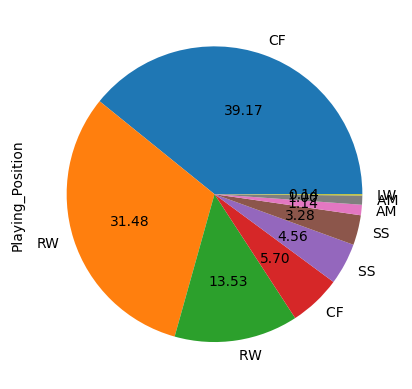

In [45]:
lm.Playing_Position.value_counts().plot(kind="pie",autopct='%.2f')

<Axes: ylabel='Venue'>

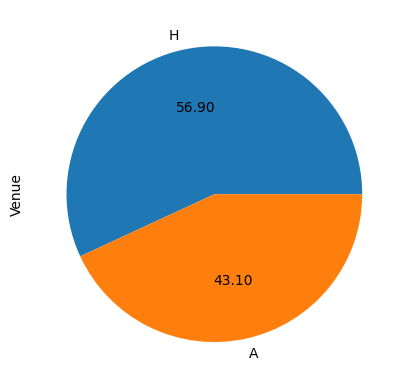

In [46]:
cr7.Venue.value_counts().plot(kind="pie",autopct='%.2f')

<Axes: ylabel='Venue'>

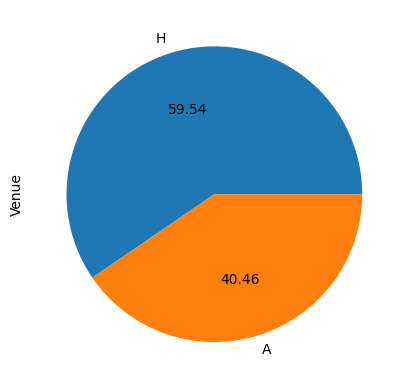

In [47]:
lm.Venue.value_counts().plot(kind="pie",autopct='%.2f')

Text(0.5, 1.0, 'CR7 10 Favourite Opponents')

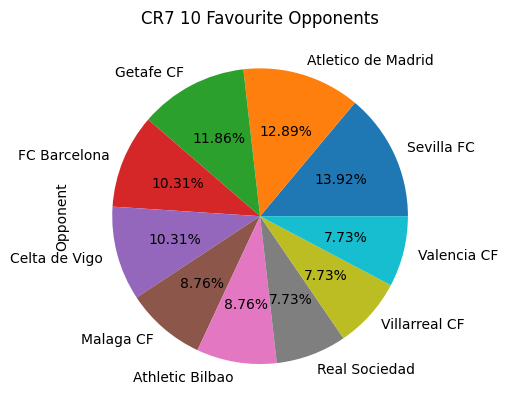

In [48]:
cr7.Opponent.value_counts()[:10].plot(kind="pie",autopct='%.2f%%')
plt.title("CR7 10 Favourite Opponents")

Text(0.5, 1.0, 'Messi 10 Favourite Opponents')

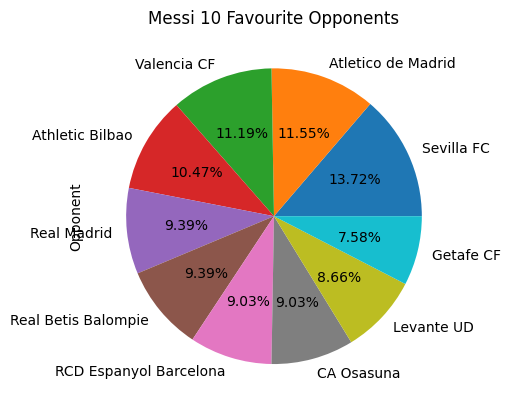

In [49]:
lm.Opponent.value_counts()[:10].plot(kind="pie",autopct='%.2f%%')
plt.title("Messi 10 Favourite Opponents")

In [50]:
df.columns

Index(['Player', 'Season', 'Competition', 'Matchday', 'Date', 'Venue', 'Club',
       'Opponent', 'Result', 'Playing_Position', 'Minute', 'At_score', 'Type',
       'Goal_assist'],
      dtype='object')

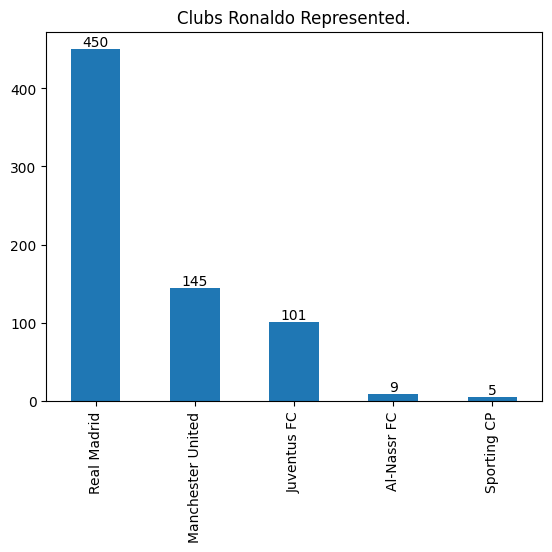

In [51]:
c=cr7.Club.value_counts().plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Clubs Ronaldo Represented.")
for container in c.containers:
    c.bar_label(container)

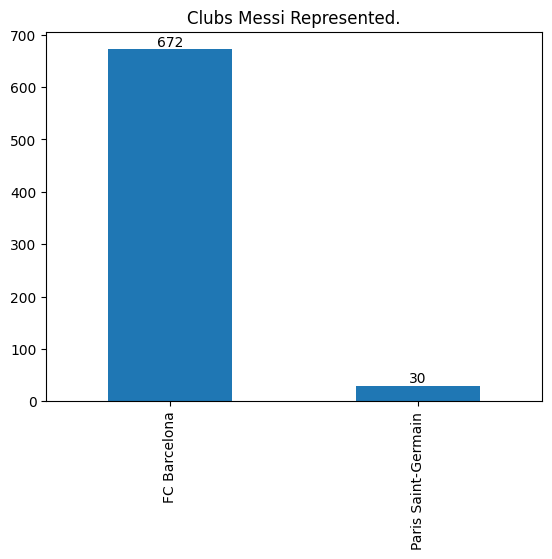

In [52]:
l=lm.Club.value_counts().plot(kind="bar")
plt.xticks(rotation=90)
plt.title("Clubs Messi Represented.")
for container in l.containers:
    l.bar_label(container)